In [ ]:
%cd /content/
!git clone https://github.com/ZanoTJ/FaceRecognizer.git

/content
Cloning into 'FaceRecognizer'...
remote: Enumerating objects: 541, done.
remote: Counting objects: 100% (541/541), done.
remote: Compressing objects: 100% (532/532), done.
remote: Total 541 (delta 12), reused 318 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (541/541), 33.63 MiB | 44.78 MiB/s, done.
Resolving deltas: 100% (12/12), done.


# Data Preprocessing

Load the data

In [ ]:
import os
from PIL import Image
from google.colab import drive

file_directory = '/content/FaceRecognizer/data'

new_images = []
for filename in os.listdir(file_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):  # Add more formats if needed
        file_path = os.path.join(file_directory, filename)

        new_images.append(file_path)

In [ ]:
new_images

['/content/FaceRecognizer/data/Priyatham (50).jpg',
 '/content/FaceRecognizer/data/Taekjin (20).jpg',
 '/content/FaceRecognizer/data/Priyatham (39).jpg',
 '/content/FaceRecognizer/data/Jenil (24).jpg',
 '/content/FaceRecognizer/data/Taekjin (35).jpg',
 '/content/FaceRecognizer/data/Jenil (41).jpg',
 '/content/FaceRecognizer/data/Priyatham (35).jpg',
 '/content/FaceRecognizer/data/Priyatham (12).jpg',
 '/content/FaceRecognizer/data/Taekjin (44).jpg',
 '/content/FaceRecognizer/data/Taekjin (43).jpg',
 '/content/FaceRecognizer/data/Taekjin (48).jpg',
 '/content/FaceRecognizer/data/Taekjin (47).jpg',
 '/content/FaceRecognizer/data/Priyatham (34).jpg',
 '/content/FaceRecognizer/data/Priyatham (38).jpg',
 '/content/FaceRecognizer/data/Jenil (46).jpg',
 '/content/FaceRecognizer/data/Priyatham (31).jpg',
 '/content/FaceRecognizer/data/Taekjin (27).jpg',
 '/content/FaceRecognizer/data/Taekjin (13).jpg',
 '/content/FaceRecognizer/data/Taekjin (17).jpg',
 '/content/FaceRecognizer/data/Jenil (4).j

.tgz file

In [ ]:
from google.colab import drive
import tarfile

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/datasets/lfw-funneled.tgz'

# Extract the .tgz file
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='/content/extracted_images')  # Extract to a folder
    print("Extraction completed.")

Extraction completed.


In [ ]:
#Load and display one image
image_folder = '/content/extracted_images'

#resize the images to 200x200 (for the input shape)
image_size = (200, 200)

# Recursively list all image files in the folder and subfolders
random_faces = []
for subdir, _, files in os.walk(image_folder):
    for file in files:
        if file.endswith(('png', 'jpg', 'jpeg')):  # Add other extensions if needed
            file_path = os.path.join(subdir, file)
            # Read the image
            image = cv2.imread(file_path)

            # Resize the image
            resized_image = cv2.resize(image, image_size)

            # Overwrite the original image
            cv2.imwrite(file_path, resized_image)

            random_faces.append(os.path.join(subdir, file))

Total number of images: 13233, Chosen image index: 5000
/content/extracted_images/lfw_funneled/Kathy_Baker/Kathy_Baker_0001.jpg


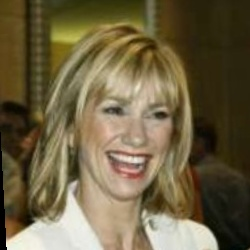

In [ ]:
index = 5000

print(f"Total number of images: {len(random_faces)}, Chosen image index: {index}")
print(random_faces[index])
Image.open(random_faces[index])

## Encode each image for the label (Flatting Structure)

In [ ]:
len(new_images), len(random_faces)

(151, 13233)

In [ ]:
import pandas as pd

labels = []
for path in new_images:
  labels.append(os.path.basename(path).split()[0])

# Create a DataFrame
known_df = pd.DataFrame({
    'File Path': new_images,
    'Label': labels
    })

# Display the DataFrame
known_df

,File Path,Label
0,/content/FaceRecognizer/data/Priyatham (50).jpg,Priyatham
1,/content/FaceRecognizer/data/Taekjin (20).jpg,Taekjin
2,/content/FaceRecognizer/data/Priyatham (39).jpg,Priyatham
3,/content/FaceRecognizer/data/Jenil (24).jpg,Jenil
4,/content/FaceRecognizer/data/Taekjin (35).jpg,Taekjin
...,...,...
146,/content/FaceRecognizer/data/Taekjin (51).jpg,Taekjin
147,/content/FaceRecognizer/data/Priyatham (49).jpg,Priyatham
148,/content/FaceRecognizer/data/Jenil (33).jpg,Jenil
149,/content/FaceRecognizer/data/Jenil (14).jpg,Jenil


In [ ]:
#dataframe for unknown
unknown_df = pd.DataFrame({
    'File Path': random_faces,
    'Label': 'unknown'
})

#select 200 from the dataframe randomly
sampled_unknown_df = unknown_df.sample(n=200, random_state=42)

sampled_unknown_df

,File Path,Label
12149,/content/extracted_images/lfw_funneled/Sila_Ca...,unknown
8355,/content/extracted_images/lfw_funneled/Eduardo...,unknown
9040,/content/extracted_images/lfw_funneled/Nicolas...,unknown
63,/content/extracted_images/lfw_funneled/Yoon_Wo...,unknown
9311,/content/extracted_images/lfw_funneled/Jim_Gre...,unknown
...,...,...
9356,/content/extracted_images/lfw_funneled/Ann_Ven...,unknown
8265,/content/extracted_images/lfw_funneled/Markus_...,unknown
2519,/content/extracted_images/lfw_funneled/Juliann...,unknown
8883,/content/extracted_images/lfw_funneled/Ataolla...,unknown


In [ ]:
def draw_face_box(img, coord, rect_color = (255,0,255), line_color = (0,255,0)):
  cropped_img = []

  for det in coord:
    bbox = det[:4]
    x1, y1, x2, y2 = map(int, bbox)

    img = np.array(img)
    cropped_img.append(img[y1:y2, x1:x2])

  return cropped_img

def face_detect(img, facial_model):
  output = facial_model(img)
  facial_results = Detections.from_ultralytics(output[0])

  # Reshape confidence array to match the shape of xyxy along axis 1
  confidence_array = facial_results.confidence.reshape(-1, 1)  # Convert 1D to 2D with 1 column

  # Concatenate xyxy (bounding boxes) and confidence along axis 1
  facial_list = np.concatenate((facial_results.xyxy, confidence_array), axis=1)

  return draw_face_box(img, facial_list, (255,0,0), (255,0,0))

In [ ]:
import cv2
import os
import pandas as pd
from huggingface_hub import hf_hub_download
from ultralytics import YOLO

# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")
facial_model = YOLO(model_path)

# Define the target size for resizing
target_size = (200, 200)

# Directory to save resized images (can be the same as the original or a new one)
output_dir = '/context/resized_images/'

# Make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

selected_faces = []
# Loop through each file path in the dataframe
for index, row in sampled_unknown_df.iterrows():
    file_path = row['File Path']  # Ensure the column name is correct

    # Check if the file exists
    if os.path.exists(file_path):
        # Read the image using OpenCV
        image = cv2.imread(file_path)

        # Check if the image was loaded correctly
        if image is not None:
            images = face_detect(image, facial_model)

            if len(images) == 1:
              image = images[0]
              # Resize the image
              resized_image = cv2.resize(image, target_size)

              # Get the filename and save the resized image
              filename = os.path.basename(file_path)
              resized_image_path = os.path.join(output_dir, filename)

              # Save the resized image
              cv2.imwrite(resized_image_path, resized_image)

              selected_faces.append(resized_image_path)
        else:
            print(f"Failed to load image: {file_path}")
    else:
        print(f"File not found: {file_path}")


0: 640x640 1 FACE, 8.1ms
Speed: 2.4ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 FACEs, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 FACE, 7.4

In [ ]:
selected_unknown_df = pd.DataFrame({
    'File Path': selected_faces,
    'Label': 'unknown'
    })

In [ ]:
#Concatenate the dataframes
df = pd.concat([known_df, selected_unknown_df], ignore_index=True)

df

,File Path,Label
0,/content/FaceRecognizer/data/Priyatham (50).jpg,Priyatham
1,/content/FaceRecognizer/data/Taekjin (20).jpg,Taekjin
2,/content/FaceRecognizer/data/Priyatham (39).jpg,Priyatham
3,/content/FaceRecognizer/data/Jenil (24).jpg,Jenil
4,/content/FaceRecognizer/data/Taekjin (35).jpg,Taekjin
...,...,...
297,/context/resized_images/Steve_Allee_0001.jpg,unknown
298,/context/resized_images/Sourav_Ganguly_0003.jpg,unknown
299,/context/resized_images/Ann_Veneman_0009.jpg,unknown
300,/context/resized_images/Julianne_Moore_0007.jpg,unknown


## Convert each image to numeric value

In [ ]:
import cv2
import numpy as np

img = df['File Path']

images_output=[]
for row in img:
  outputImage = np.zeros((128, 128, 3), dtype="uint8")
  outputImage = cv2.imread(row)

  images_output.append(outputImage)

In [ ]:
img

,File Path
0,/content/FaceRecognizer/data/Priyatham (50).jpg
1,/content/FaceRecognizer/data/Taekjin (20).jpg
2,/content/FaceRecognizer/data/Priyatham (39).jpg
3,/content/FaceRecognizer/data/Jenil (24).jpg
4,/content/FaceRecognizer/data/Taekjin (35).jpg
...,...
297,/context/resized_images/Steve_Allee_0001.jpg
298,/context/resized_images/Sourav_Ganguly_0003.jpg
299,/context/resized_images/Ann_Veneman_0009.jpg
300,/context/resized_images/Julianne_Moore_0007.jpg


array([[[ 31,  68,  90],
        [ 31,  68,  90],
        [ 30,  69,  91],
        ...,
        [ 98, 175, 184],
        [102, 177, 185],
        [103, 178, 186]],

       [[ 33,  70,  92],
        [ 33,  70,  92],
        [ 33,  72,  94],
        ...,
        [ 97, 174, 183],
        [100, 175, 183],
        [102, 177, 185]],

       [[ 34,  71,  93],
        [ 35,  72,  94],
        [ 35,  73,  97],
        ...,
        [ 96, 174, 181],
        [ 99, 174, 182],
        [101, 176, 184]],

       ...,

       [[ 30,  29,  45],
        [ 29,  28,  44],
        [ 31,  31,  47],
        ...,
        [ 62,  60,  42],
        [ 56,  56,  40],
        [ 54,  55,  39]],

       [[ 31,  29,  48],
        [ 31,  29,  48],
        [ 33,  31,  50],
        ...,
        [ 61,  60,  40],
        [ 57,  55,  37],
        [ 54,  54,  36]],

       [[ 33,  31,  50],
        [ 33,  31,  50],
        [ 35,  33,  52],
        ...,
        [ 63,  60,  39],
        [ 57,  55,  37],
        [ 57,  55,  37]]], dtype=uint8)
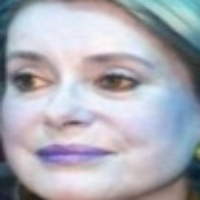

In [ ]:
images_output[200]

In [ ]:
import numpy as np

img_arr = np.asarray(images_output)

In [ ]:
img_arr.shape

(302, 200, 200, 3)

## Encode the output data

In [ ]:
from sklearn import preprocessing

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [ ]:
label_train = encode_text_index(df, "Label")
encode_text_dummy(df, "Label")

In [ ]:
label_train

array(['Jenil', 'Priyatham', 'Taekjin', 'unknown'], dtype=object)

In [ ]:
#save the arrays
from google.colab import drive
drive.mount('/content/drive')

np.save(f'/content/drive/MyDrive/saved_model/labels.npy', label_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(302, 5)

In [ ]:
print(label_train)
df

['Jenil' 'Priyatham' 'Taekjin' 'unknown']


,File Path,Label-0,Label-1,Label-2,Label-3
0,/content/FaceRecognizer/data/Priyatham (50).jpg,False,True,False,False
1,/content/FaceRecognizer/data/Taekjin (20).jpg,False,False,True,False
2,/content/FaceRecognizer/data/Priyatham (39).jpg,False,True,False,False
3,/content/FaceRecognizer/data/Jenil (24).jpg,True,False,False,False
4,/content/FaceRecognizer/data/Taekjin (35).jpg,False,False,True,False
...,...,...,...,...,...
297,/context/resized_images/Steve_Allee_0001.jpg,False,False,False,True
298,/context/resized_images/Sourav_Ganguly_0003.jpg,False,False,False,True
299,/context/resized_images/Ann_Veneman_0009.jpg,False,False,False,True
300,/context/resized_images/Julianne_Moore_0007.jpg,False,False,False,True


#Data Split for Training/Testing

In [ ]:
df.drop('File Path', axis=1, inplace=True)

In [ ]:
df.shape

(302, 4)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_arr, df, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

#df: output value
#img: input value

((226, 200, 200, 3), (76, 200, 200, 3), (226, 4), (76, 4))

# Define the Model - CNN

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Default input shape (224x224x3)
target_size = (200, 200)

# Load InceptionV3 with pre-trained ImageNet weights, excluding the top layers
inception_model = InceptionV3(weights='imagenet', input_shape=(200, 200, 3), include_top=False)

for layer in inception_model.layers[:-10]:    #Freeze some of the layers to train our dataset
  layer.trainable = False
  layer_output = layer.output
  #print(layer.name, layer_output.shape)

In [ ]:
inception_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_752 (Conv2D)       │ (None, 99, 99, 32)     │            864 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_770   │ (None, 99, 99, 32)     │             96 │ conv2d_752[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_752            │ (None, 99, 99, 32)     │              0 │ batch_normalization_7… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_753 (Conv2D)       │ (None, 97, 97, 32)     │          9,216 │ activation_752[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_771   │ (None, 97, 97, 32)     │             96 │ conv2d_753[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_753            │ (None, 97, 97, 32)     │              0 │ batch_normalization_7… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_754 (Conv2D)       │ (None, 97, 97, 64)     │         18,432 │ activation_753[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_772   │ (None, 97, 97, 64)     │            192 │ conv2d_754[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_754            │ (None, 97, 97, 64)     │              0 │ batch_normalization_7… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_32          │ (None, 48, 48, 64)     │              0 │ activation_754[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_755 (Conv2D)       │ (None, 48, 48, 80)     │          5,120 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_773   │ (None, 48, 48, 80)     │            240 │ conv2d_755[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_755            │ (None, 48, 48, 80)     │              0 │ batch_normalization_7… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_756 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 192 (768.00 B)

 Non-trainable params: 21,802,592 (83.17 MB)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model

#Model Creation
model = Sequential()
model.add(inception_model)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(df.shape[1], activation="softmax"))

## Compile the model

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.math.pow((1 - y_pred), gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

In [ ]:
model.compile(loss=focal_loss(), optimizer=optimizers.Adam(0.0001), metrics=['accuracy'])
model.build((None, 200, 200, 3))

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 4, 4, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_864              │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_865              │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,781,732 (147.94 MB)

 Trainable params: 16,977,604 (64.76 MB)

 Non-trainable params: 21,804,128 (83.18 MB)

# Model Training

In [ ]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import time

start_time = time.time()

batch_size = 128

moniter = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/face_recognizer.weights.h5", verbose=0, save_weights_only=True,  save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

y_train_array = y_train.to_numpy()

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_array),  # Ensure y_train is the correct array of class labels
    y=y_train_array.flatten()  # Flatten if y_train is in one-hot format
)
class_weights[-1] *= 1.5  # Increase weight for 'unknown'
class_weight_dict = dict(enumerate(class_weights))

# To generate more images from the data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=(0.7, 1.3),  #Zoom out, zoom in
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
    )

# Generate augmented data
datagen.fit(x_train)

for i in range(5):
  model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
            epochs=1000,
            verbose=2,
            validation_data=(x_test, y_test), callbacks=[moniter, checkpointer, reduce_lr],
            class_weight=class_weight_dict)

  model.load_weights('dnn/face_recognizer.weights.h5')

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/1000


2/2 - 40s - 20s/step - accuracy: 0.3097 - loss: 0.3657 - val_accuracy: 0.5263 - val_loss: 0.8348 - learning_rate: 1.0000e-04
Epoch 2/1000
2/2 - 4s - 2s/step - accuracy: 0.5708 - loss: 0.1902 - val_accuracy: 0.6053 - val_loss: 0.7402 - learning_rate: 1.0000e-04
Epoch 3/1000
2/2 - 4s - 2s/step - accuracy: 0.7035 - loss: 0.1323 - val_accuracy: 0.4342 - val_loss: 0.6849 - learning_rate: 1.0000e-04
Epoch 4/1000
2/2 - 3s - 1s/step - accuracy: 0.7168 - loss: 0.1056 - val_accuracy: 0.3026 - val_loss: 0.7156 - learning_rate: 1.0000e-04
Epoch 5/1000
2/2 - 3s - 1s/step - accuracy: 0.8230 - loss: 0.0702 - val_accuracy: 0.3026 - val_loss: 0.7803 - learning_rate: 1.0000e-04
Epoch 6/1000
2/2 - 4s - 2s/step - accuracy: 0.7965 - loss: 0.0709 - val_accuracy: 0.3158 - val_loss: 0.6833 - learning_rate: 1.0000e-04
Epoch 7/1000
2/2 - 4s - 2s/step - accuracy: 0.7920 - loss: 0.0813 - val_accuracy: 0.3553 - val_loss: 0.5577 - learning_rate: 1.0000e-04
Epoch 8/1000
2/2 - 4s - 2s/step - accuracy: 0.8451 - loss: 

2/2 - 3s - 1s/step - accuracy: 0.9336 - loss: 0.0248 - val_accuracy: 0.7368 - val_loss: 0.0759 - learning_rate: 5.0000e-05
Epoch 2/1000
2/2 - 3s - 1s/step - accuracy: 0.9558 - loss: 0.0183 - val_accuracy: 0.7368 - val_loss: 0.0764 - learning_rate: 5.0000e-05
Epoch 3/1000
2/2 - 3s - 1s/step - accuracy: 0.9558 - loss: 0.0203 - val_accuracy: 0.7105 - val_loss: 0.0763 - learning_rate: 5.0000e-05
Epoch 4/1000
2/2 - 3s - 1s/step - accuracy: 0.9204 - loss: 0.0236 - val_accuracy: 0.7368 - val_loss: 0.0772 - learning_rate: 5.0000e-05
Epoch 5/1000
2/2 - 3s - 1s/step - accuracy: 0.9513 - loss: 0.0184 - val_accuracy: 0.7368 - val_loss: 0.0766 - learning_rate: 2.5000e-05
Epoch 6/1000
2/2 - 4s - 2s/step - accuracy: 0.9292 - loss: 0.0237 - val_accuracy: 0.7500 - val_loss: 0.0752 - learning_rate: 2.5000e-05
Epoch 7/1000
2/2 - 4s - 2s/step - accuracy: 0.9513 - loss: 0.0220 - val_accuracy: 0.7500 - val_loss: 0.0734 - learning_rate: 2.5000e-05
Epoch 8/1000
2/2 - 4s - 2s/step - accuracy: 0.9425 - loss: 0.

2/2 - 3s - 1s/step - accuracy: 0.9558 - loss: 0.0183 - val_accuracy: 0.7632 - val_loss: 0.0675 - learning_rate: 2.5000e-05
Epoch 2/1000
2/2 - 4s - 2s/step - accuracy: 0.9204 - loss: 0.0247 - val_accuracy: 0.7632 - val_loss: 0.0672 - learning_rate: 2.5000e-05
Epoch 3/1000
2/2 - 4s - 2s/step - accuracy: 0.9513 - loss: 0.0146 - val_accuracy: 0.7632 - val_loss: 0.0666 - learning_rate: 2.5000e-05
Epoch 4/1000
2/2 - 3s - 1s/step - accuracy: 0.9690 - loss: 0.0169 - val_accuracy: 0.7632 - val_loss: 0.0668 - learning_rate: 2.5000e-05
Epoch 5/1000
2/2 - 3s - 1s/step - accuracy: 0.9646 - loss: 0.0175 - val_accuracy: 0.7763 - val_loss: 0.0679 - learning_rate: 2.5000e-05
Epoch 6/1000
2/2 - 3s - 1s/step - accuracy: 0.9558 - loss: 0.0160 - val_accuracy: 0.7763 - val_loss: 0.0694 - learning_rate: 2.5000e-05
Epoch 7/1000
2/2 - 3s - 1s/step - accuracy: 0.9513 - loss: 0.0188 - val_accuracy: 0.7763 - val_loss: 0.0696 - learning_rate: 1.2500e-05
Epoch 8/1000
2/2 - 3s - 1s/step - accuracy: 0.9513 - loss: 0.

2/2 - 4s - 2s/step - accuracy: 0.9646 - loss: 0.0147 - val_accuracy: 0.8158 - val_loss: 0.0489 - learning_rate: 3.1250e-06
Epoch 2/1000
2/2 - 3s - 1s/step - accuracy: 0.9469 - loss: 0.0195 - val_accuracy: 0.8158 - val_loss: 0.0489 - learning_rate: 3.1250e-06
Epoch 3/1000
2/2 - 3s - 1s/step - accuracy: 0.9558 - loss: 0.0134 - val_accuracy: 0.8158 - val_loss: 0.0489 - learning_rate: 3.1250e-06
Epoch 4/1000
2/2 - 4s - 2s/step - accuracy: 0.9469 - loss: 0.0193 - val_accuracy: 0.8158 - val_loss: 0.0489 - learning_rate: 3.1250e-06
Epoch 5/1000
2/2 - 4s - 2s/step - accuracy: 0.9513 - loss: 0.0151 - val_accuracy: 0.8158 - val_loss: 0.0488 - learning_rate: 1.5625e-06
Epoch 6/1000
2/2 - 4s - 2s/step - accuracy: 0.9602 - loss: 0.0189 - val_accuracy: 0.8158 - val_loss: 0.0487 - learning_rate: 1.5625e-06
Epoch 7/1000
2/2 - 4s - 2s/step - accuracy: 0.9646 - loss: 0.0130 - val_accuracy: 0.8158 - val_loss: 0.0486 - learning_rate: 1.5625e-06
Epoch 8/1000
2/2 - 4s - 2s/step - accuracy: 0.9513 - loss: 0.

2/2 - 4s - 2s/step - accuracy: 0.9381 - loss: 0.0233 - val_accuracy: 0.8026 - val_loss: 0.0476 - learning_rate: 1.5625e-06
Epoch 2/1000
2/2 - 4s - 2s/step - accuracy: 0.9735 - loss: 0.0122 - val_accuracy: 0.8026 - val_loss: 0.0476 - learning_rate: 1.5625e-06
Epoch 3/1000
2/2 - 4s - 2s/step - accuracy: 0.9425 - loss: 0.0165 - val_accuracy: 0.8026 - val_loss: 0.0475 - learning_rate: 1.5625e-06
Epoch 4/1000
2/2 - 4s - 2s/step - accuracy: 0.9558 - loss: 0.0166 - val_accuracy: 0.8026 - val_loss: 0.0474 - learning_rate: 1.5625e-06
Epoch 5/1000
2/2 - 4s - 2s/step - accuracy: 0.9690 - loss: 0.0168 - val_accuracy: 0.8026 - val_loss: 0.0474 - learning_rate: 1.5625e-06
Epoch 6/1000
2/2 - 4s - 2s/step - accuracy: 0.9690 - loss: 0.0152 - val_accuracy: 0.8026 - val_loss: 0.0473 - learning_rate: 1.5625e-06
Epoch 7/1000
2/2 - 4s - 2s/step - accuracy: 0.9690 - loss: 0.0142 - val_accuracy: 0.8026 - val_loss: 0.0473 - learning_rate: 1.5625e-06
Epoch 8/1000
2/2 - 4s - 2s/step - accuracy: 0.9425 - loss: 0.

In [ ]:
model.evaluate(x_train, y_train, verbose=2)

8/8 - 5s - 609ms/step - accuracy: 1.0000 - loss: 0.0036


[0.003585651284083724, 1.0]

### Accuracy

In [ ]:
x_train.shape

(226, 200, 200, 3)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print(model.input_shape, model.output_shape)
model.summary()

(None, 200, 200, 3) (None, 4)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 4, 4, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_864              │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_865              │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,736,942 (277.47 MB)

 Trainable params: 16,977,604 (64.76 MB)

 Non-trainable params: 21,804,128 (83.18 MB)

 Optimizer params: 33,955,210 (129.53 MB)

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)

In [ ]:
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.003585651284083724
Test accuracy: 1.0


In [ ]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))


print(metrics.classification_report(y_true, pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
Accuracy: 0.8026315789473685
Averaged F1: 0.8038552942520762
              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.85      0.61      0.71        18
           2       0.67      0.62      0.64        13
           3       0.95      0.97      0.96        36

    accuracy                           0.80        76
   macro avg       0.74      0.74      0.73        76
weighted avg       0.82      0.80      0.80        76



In [ ]:
y_true, pred

(array([3, 3, 1, 3, 2, 2, 1, 3, 3, 2, 0, 1, 1, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 0, 3, 1, 1, 3, 3, 2, 2, 3, 1, 1, 0, 2, 2, 1, 1, 2, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 3, 2, 1, 3, 0, 3, 2]),
 array([3, 3, 1, 3, 2, 2, 0, 3, 3, 2, 0, 2, 0, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 0, 3, 1, 1, 3, 3, 2, 0, 3, 2, 1, 0, 0, 2, 1, 1, 2, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 1, 1, 3, 3, 2, 1, 3, 0, 3, 0]))

# Graph (Plots)

### Functions

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## Confusion Matrix

[[ 7  1  1  0]
 [ 3 11  2  2]
 [ 4  1  8  0]
 [ 0  0  1 35]]
Plotting confusion matrix


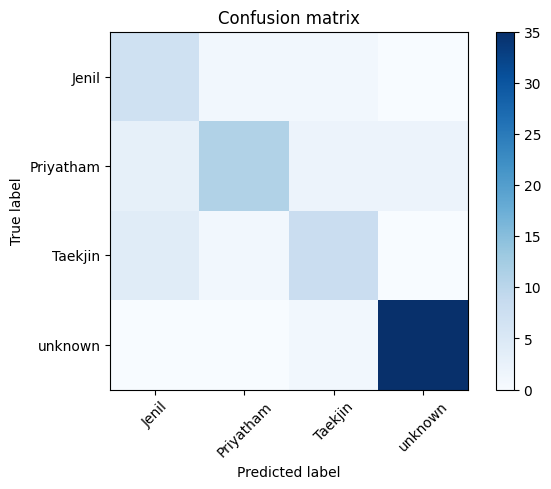

              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.85      0.61      0.71        18
           2       0.67      0.62      0.64        13
           3       0.95      0.97      0.96        36

    accuracy                           0.80        76
   macro avg       0.74      0.74      0.73        76
weighted avg       0.82      0.80      0.80        76



In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, pred)
print(cm)


print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label_train)
plt.show()

print(classification_report(y_true, pred))

# Show the result!

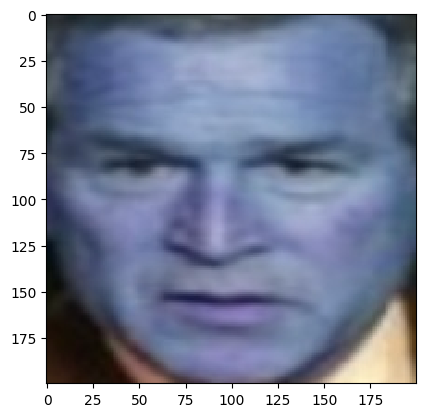

Prediction: unknown, True: unknown


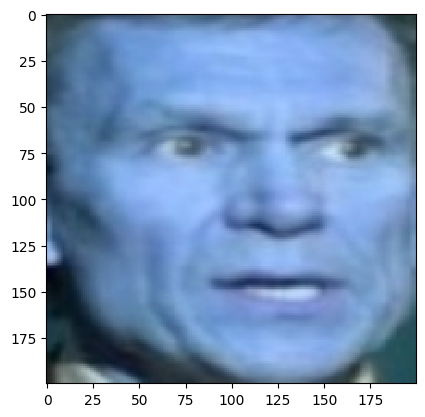

Prediction: unknown, True: unknown


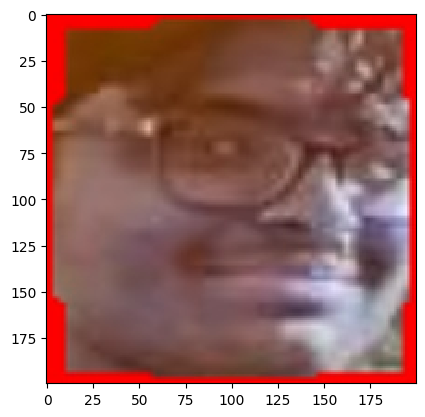

Prediction: Priyatham, True: Priyatham


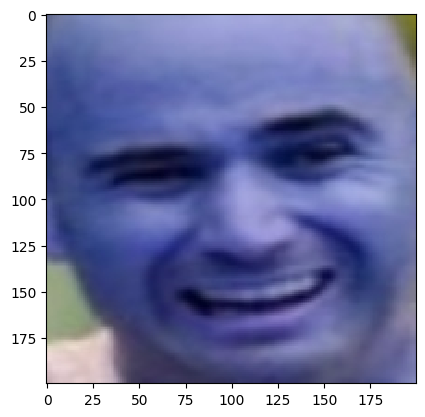

Prediction: unknown, True: unknown


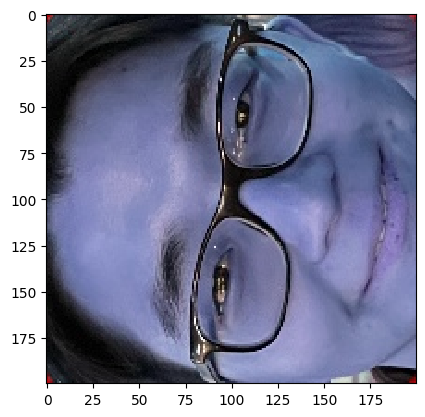

Prediction: Taekjin, True: Taekjin


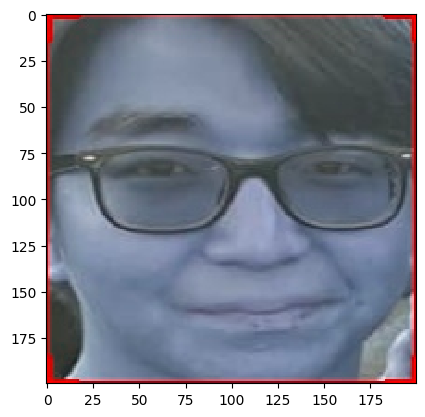

Prediction: Taekjin, True: Taekjin


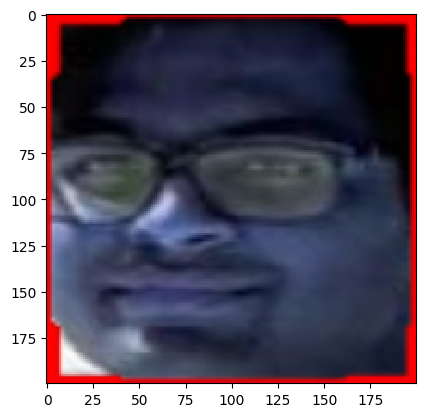

Prediction: Jenil, True: Priyatham


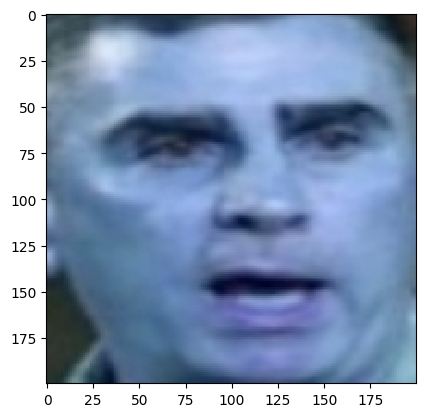

Prediction: unknown, True: unknown


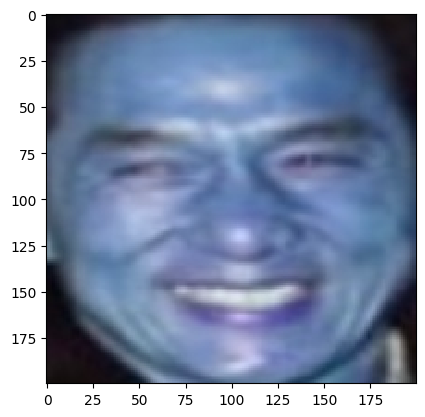

Prediction: unknown, True: unknown


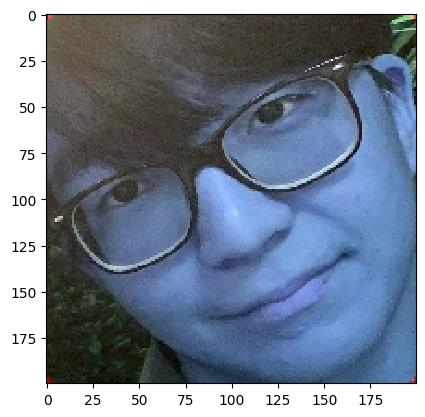

Prediction: Taekjin, True: Taekjin


In [ ]:
# Sample predictions
for i in range(10):
  plt.imshow(x_test[i], interpolation='nearest')
  plt.show()

  print("Prediction: {}, True: {}".format(label_train[pred[i]], label_train[y_true[i]]))

# Save model

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

# Save the model in Google Drive
model.save('/content/drive/MyDrive/saved_model/test_model_new.h5')

# Load model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/saved_model//test_model_new.h5', custom_objects={'focal_loss_fixed': focal_loss})

# Single Detection

### Testing multiple images

In [ ]:
from google.colab.patches import cv2_imshow

file_directory = '/content/'

test_images = []

# Loop through each image file in the directory
for filename in os.listdir(file_directory):
    if filename.endswith((".jpg", ".jpeg", ".png")):  # Add more formats if needed
        img_path = os.path.join(file_directory, filename)

        # Read the image using OpenCV
        img = cv2.imread(img_path)
        img_array = np.array(img)
        img_array = img_array.astype('float32')
        test_images.append(img_array)

for img in test_images:
  test_image = img
  input_image = np.expand_dims(test_image, axis=0)

  sample_result = model.predict(input_image)
  print(sample_result)

  sample_result = np.argmax(sample_result,axis=1)
  print(sample_result)

  print(label_train)
  print(label_train[sample_result])

  cv2_imshow(img)

#Let's Implement Everything!!

## Functions

In [ ]:
!pip install pillow

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import time

import cv2
import numpy as np
import os
import shutil

from google.colab import files
from google.colab.patches import cv2_imshow

def draw_corner_rect(img, bbox, line_length=30, line_thickness=5, rect_thickness=1,
                     rect_color=(255, 0, 255), line_color=(0, 255, 0)):
    x, y, w, h = bbox
    x1, y1 = x + w, y + h

    if rect_thickness != 0:
        cv2.rectangle(img, bbox, rect_color, rect_thickness)

    # Top Left  x, y
    cv2.line(img, (x, y), (x + line_length, y), line_color, line_thickness)
    cv2.line(img, (x, y), (x, y + line_length), line_color, line_thickness)

    # Top Right  x1, y
    cv2.line(img, (x1, y), (x1 - line_length, y), line_color, line_thickness)
    cv2.line(img, (x1, y), (x1, y + line_length), line_color, line_thickness)

    # Bottom Left  x, y1
    cv2.line(img, (x, y1), (x + line_length, y1), line_color, line_thickness)
    cv2.line(img, (x, y1), (x, y1 - line_length), line_color, line_thickness)

    # Bottom Right  x1, y1
    cv2.line(img, (x1, y1), (x1 - line_length, y1), line_color, line_thickness)
    cv2.line(img, (x1, y1), (x1, y1 - line_length), line_color, line_thickness)

    return img

def draw_face_box(img, coord, rect_color = (255,0,255), line_color = (0,255,0)):
  cropped_img = []

  for det in coord:
    bbox = det[:4]
    x1, y1, x2, y2 = map(int, bbox)

    img = np.array(img)
    cropped_img.append(img[y1:y2, x1:x2])
    img = draw_corner_rect(img, (x1, y1, x2 - x1, y2 - y1), line_length=15, line_thickness=3, rect_thickness=1, rect_color=rect_color, line_color=line_color)

  return img, cropped_img

def face_detect(img, facial_model):
  output = facial_model(img)
  facial_results = Detections.from_ultralytics(output[0])

  # Reshape confidence array to match the shape of xyxy along axis 1
  confidence_array = facial_results.confidence.reshape(-1, 1)  # Convert 1D to 2D with 1 column

  # Concatenate xyxy (bounding boxes) and confidence along axis 1
  facial_list = np.concatenate((facial_results.xyxy, confidence_array), axis=1)

  new_img, persons = draw_face_box(img, facial_list, (255,0,0), (255,0,0))

  return new_img, persons

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  return img

def recg_single(img, model):
  img_array = np.array(img)
  img_array = img_array.astype('float32')
  print(img_array.shape)

  test_image = img_array     #change this value (numpy image)
  input_image = np.expand_dims(test_image, axis=0)
  sample_result = model.predict(input_image)
  print(sample_result)

  sample_result = np.argmax(sample_result, axis=1)

  print(label_train)
  print(label_train[sample_result])

  cv2_imshow(img_array)

def capture_detection(facial_model):
  img = take_photo()
  print(type(img))
  new_img, persons = face_detect(img, facial_model)

  # Create directory if it doesn't exist
  saving_path = '/content/images'
  os.makedirs(saving_path, exist_ok=True)

  face_size = 200

  for i, person in enumerate(persons):
    timestamp = int(time.time())
    face_img = cv2.resize(person, (face_size, face_size))

    filename = f'output_image_{timestamp + i}.jpg'
    cv2.imwrite(os.path.join('/content/images', filename), face_img)
    cv2_imshow(face_img)
    cv2.waitKey(0)

  cv2.destroyAllWindows()

  persons = []

  cv2_imshow(new_img)

  return face_img

# Implementation of Face YOLO

In [ ]:
!pip install ultralytics
!pip install supervision

# load libraries
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image
from google.colab.patches import cv2_imshow

# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
facial_model = YOLO(model_path)

<IPython.core.display.Javascript object>

<class 'numpy.ndarray'>

0: 480x640 1 FACE, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


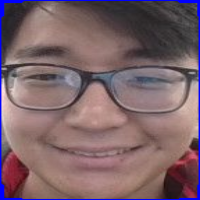

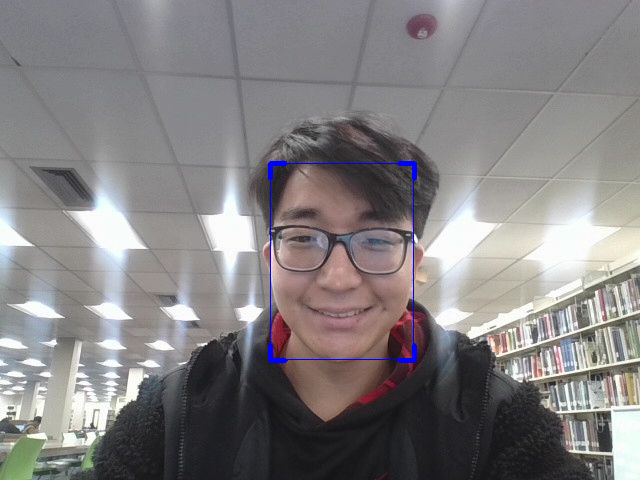

(200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[   0.063024     0.28296     0.63153    0.022484]]
['Jenil' 'Priyatham' 'Taekjin' 'unknown']
['Taekjin']


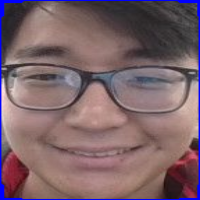

In [ ]:
img = capture_detection(facial_model)
recg_single(img, model)